**Data Import and Structuring**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

In [3]:
# Combine data
from data_preprocess import adjust_and_copy_csvs, merge_activity_data_and_update_networks, process_datasets, process_activity_recording_to_csv

base_path = '/Users/liufanling/Library/CloudStorage/OneDrive-Personal/1 UC DAVIS/2024 Summer/CSRA/QualityCheck/QuickCheck'
excel_filename = 'simple_check.xlsx'
process_activity_recording_to_csv(base_path, excel_filename)


source = '/Users/liufanling/Library/CloudStorage/OneDrive-Personal/1 UC DAVIS/2024 Summer/CSRA/QualityCheck/CSVs'
destination = '/Users/liufanling/Library/CloudStorage/OneDrive-Personal/1 UC DAVIS/2024 Summer/CSRA/QualityCheck/HomoCheck'
quickcheck = '/Users/liufanling/Library/CloudStorage/OneDrive-Personal/1 UC DAVIS/2024 Summer/CSRA/QualityCheck/QuickCheck'

process_datasets(source, destination, quickcheck)

Data processing complete. Files have been saved in their respective directories.


In [4]:
# prepare ref file
from data_preprocess import make_reffile

source_excel_path = '/Users/liufanling/Library/CloudStorage/OneDrive-Personal/1 UC DAVIS/2024 Summer/CSRA/QualityCheck/Reffiles/selected_Check.xlsx'
destination_excel_path = '/Users/liufanling/Library/CloudStorage/OneDrive-Personal/1 UC DAVIS/2024 Summer/CSRA/QualityCheck/Reffiles/Reffile.xlsx'
make_reffile(source_excel_path, destination_excel_path)

In [5]:
# Load the combined data
from data_preprocess import merge_csvs, combine_all_data

base_path = '/Users/liufanling/Library/CloudStorage/OneDrive-Personal/1 UC DAVIS/2024 Summer/CSRA/QualityCheck/HomoCheck'
ref_file_path = '/Users/liufanling/Library/CloudStorage/OneDrive-Personal/1 UC DAVIS/2024 Summer/CSRA/QualityCheck/Reffiles/Reffile.xlsx'

# Process the data and get the combined DataFrames
combined_dataframes = merge_csvs(base_path, ref_file_path)

# Combine all DataFrames into one
data = combine_all_data(combined_dataframes)

Data processing completed for all directories
Final combined data shape: (1436, 28)


In [6]:
data.head()

,DIV,Well,NeuronType,Chip_ID,Trial,Mean_FiringRate,Mean_SpikeAmplitude,Active_area,mean_IBI,cov_IBI,...,cov_BurstDuration,MeanNetworkISI,CoVNetworkISI,MeanWithinBurstISI,CoVWithinBurstISI,MeanOutsideBurstISI,CoVOutsideBurstISI,Fanofactor,Burst_Peak_Abs,Burst_Peak_Normalized
0,5,1,MxHEMI,M07039,CDKL5-E6D_T1_C1_05152024,0.601701,72.853541,25.606061,11.740000,52.305887,...,0.0,1.267112,313.628048,0.073282,103.861536,0.357242,68.420284,178.884363,NaN,NaN
1,5,2,WT,M07039,CDKL5-E6D_T1_C1_05152024,1.005935,49.774901,15.848485,44.700000,0.000000,...,NaN,0.740302,289.047687,NaN,NaN,NaN,NaN,12.371173,NaN,NaN
2,5,3,FxHET,M07039,CDKL5-E6D_T1_C1_05152024,0.668804,68.087166,14.712121,42.716667,77.475001,...,0.0,0.976505,287.602414,0.048190,92.642437,0.345847,69.803350,41.171271,NaN,NaN
3,5,4,MxHEMI,M07039,CDKL5-E6D_T1_C1_05152024,0.465627,74.338109,21.621212,17.620000,39.863558,...,0.0,1.618887,295.330918,0.066445,107.517068,0.378431,66.455322,208.423889,NaN,NaN
4,5,5,WT,M07039,CDKL5-E6D_T1_C1_05152024,0.859133,48.574638,15.787879,NaN,NaN,...,NaN,0.866212,285.151705,NaN,NaN,NaN,NaN,14.770573,NaN,NaN


In [7]:
# select WT data
wt_data = data[data['NeuronType'] == 'WT']
wt_data['DIV'] = wt_data['DIV'].astype('int')
wt_data.shape

(694, 28)

In [8]:
wt_data.head()

,DIV,Well,NeuronType,Chip_ID,Trial,Mean_FiringRate,Mean_SpikeAmplitude,Active_area,mean_IBI,cov_IBI,...,cov_BurstDuration,MeanNetworkISI,CoVNetworkISI,MeanWithinBurstISI,CoVWithinBurstISI,MeanOutsideBurstISI,CoVOutsideBurstISI,Fanofactor,Burst_Peak_Abs,Burst_Peak_Normalized
1,5,2,WT,M07039,CDKL5-E6D_T1_C1_05152024,1.005935,49.774901,15.848485,44.7,0.000000,...,NaN,0.740302,289.047687,NaN,NaN,NaN,NaN,12.371173,NaN,NaN
4,5,5,WT,M07039,CDKL5-E6D_T1_C1_05152024,0.859133,48.574638,15.787879,NaN,NaN,...,NaN,0.866212,285.151705,NaN,NaN,NaN,NaN,14.770573,NaN,NaN
6,5,1,WT,M07420,CDKL5-E6D_T1_C1_05152024,0.966328,60.385641,23.863636,29.1,106.383339,...,0.0,0.977964,351.166363,0.110062,129.623709,0.332086,71.646849,41.721689,NaN,NaN
7,5,2,WT,M07420,CDKL5-E6D_T1_C1_05152024,0.866217,62.207961,18.530303,180.0,0.000000,...,NaN,1.050997,388.106047,NaN,NaN,NaN,NaN,55.491613,NaN,NaN
8,5,3,WT,M07420,CDKL5-E6D_T1_C1_05152024,0.973242,59.716902,18.030303,66.9,75.009672,...,0.0,0.963180,344.971740,0.083943,159.761376,0.331156,73.224236,56.761980,NaN,NaN


In [9]:
# check div 21
# Assuming 'Trial' is a column, find unique trials
trials = wt_data['Trial'].unique()

# Define the DIV range
div_range = range(19, 25)  # This will include 20, 21, 22, 23, 24, 25

# Prepare to check for DIV presence in each trial
results = {}

for trial in trials:
    # Filter the wt data for the current trial
    trial_data = wt_data[wt_data['Trial'] == trial]
    present_divs = [div for div in div_range if any(trial_data['DIV'] == div)]
    
    # Store the results with a format
    if present_divs:
        results[trial] = f"div {', '.join(map(str, present_divs))} present in trial {trial}"
    else:
        results[trial] = f"No divs from {div_range.start} to {div_range.stop - 1} present in trial {trial}"

# Output the formatted results
for trial, result in results.items():
    print(result)

div 20, 23 present in trial CDKL5-E6D_T1_C1_05152024
div 19, 22 present in trial SYNGAP1_T1_C1_03212024
div 21 present in trial ADNP_T2_10262023
div 21, 24 present in trial KCNT1_T3_C1_03122024
div 20, 23 present in trial SPTAN1_T1_07192023
div 21, 24 present in trial KCNT1_T1_08082023
div 21, 24 present in trial ADNP_T3_11072023
div 20, 23 present in trial SHANK3_T1_11222023
div 21 present in trial ADNP_T4_C1_06282024
div 21 present in trial CHD8_T2_C1_08252023


In [10]:
# check div dtype
wt_data.dtypes

DIV                        int64
Well                      object
NeuronType                object
Chip_ID                   object
Trial                     object
Mean_FiringRate          float64
Mean_SpikeAmplitude      float64
Active_area              float64
mean_IBI                 float64
cov_IBI                  float64
mean_Burst_Peak          float64
cov_Burst_Peak           float64
Number_Bursts              int64
mean_Spike_per_Burst     float64
cov_Spike_per_Burst      float64
mean_Burst_Peak_Abs      float64
cov_Burst_Peak_Abs       float64
mean_BurstDuration       float64
cov_BurstDuration        float64
MeanNetworkISI           float64
CoVNetworkISI            float64
MeanWithinBurstISI       float64
CoVWithinBurstISI        float64
MeanOutsideBurstISI      float64
CoVOutsideBurstISI       float64
Fanofactor               float64
Burst_Peak_Abs           float64
Burst_Peak_Normalized    float64
dtype: object

In [11]:
# Select data for DIVs between 19 and 24
trials = wt_data['Trial'].unique()

# Prepare a DataFrame to store selected data
selected_data = pd.DataFrame()

for trial in trials:
    # Data for the current trial
    trial_data = wt_data[wt_data['Trial'] == trial]

    # Filter data for DIVs between 19 and 24
    filtered_data = trial_data[(trial_data['DIV'] >= 19) & (trial_data['DIV'] <= 24)]

    # Append the filtered rows to the final DataFrame
    selected_data = pd.concat([selected_data, filtered_data], ignore_index=True)

    # If filtered data is not empty, print the unique DIVs selected for this trial
    if not filtered_data.empty:
        unique_divs = filtered_data['DIV'].unique()
        print(f"Selected DIVs {list(unique_divs)} for trial {trial}")

Selected DIVs [20, 23] for trial CDKL5-E6D_T1_C1_05152024
Selected DIVs [19, 22] for trial SYNGAP1_T1_C1_03212024
Selected DIVs [21] for trial ADNP_T2_10262023
Selected DIVs [21, 24] for trial KCNT1_T3_C1_03122024
Selected DIVs [20, 23] for trial SPTAN1_T1_07192023
Selected DIVs [21, 24] for trial KCNT1_T1_08082023
Selected DIVs [21, 24] for trial ADNP_T3_11072023
Selected DIVs [20, 23] for trial SHANK3_T1_11222023
Selected DIVs [21] for trial ADNP_T4_C1_06282024
Selected DIVs [21] for trial CHD8_T2_C1_08252023


In [12]:
# select trials
trials = ['ADNP_T4_C1_06282024','CDKL5-E6D_T1_C1_05152024', 'KCNT1_T3_C1_03122024','SHANK3_T1_11222023','KCNT1_T1_08082023','SYNGAP1_T1_C1_03212024']
small_trials_data = selected_data[selected_data['Trial'].isin(trials)]
# # All trials without ADNP_T3_11072023
# all_trials_data = selected_data[selected_data['Trial'] != 'ADNP_T3_11072023']
all_trials_data = selected_data

**Exploratory Data Analysis (EDA)**

Selected features: Activity area, Spike Amplitude, Firing Rate, network: ..., ISI

In [13]:
selected_data.columns

Index(['DIV', 'Well', 'NeuronType', 'Chip_ID', 'Trial', 'Mean_FiringRate',
       'Mean_SpikeAmplitude', 'Active_area', 'mean_IBI', 'cov_IBI',
       'mean_Burst_Peak', 'cov_Burst_Peak', 'Number_Bursts',
       'mean_Spike_per_Burst', 'cov_Spike_per_Burst', 'mean_Burst_Peak_Abs',
       'cov_Burst_Peak_Abs', 'mean_BurstDuration', 'cov_BurstDuration',
       'MeanNetworkISI', 'CoVNetworkISI', 'MeanWithinBurstISI',
       'CoVWithinBurstISI', 'MeanOutsideBurstISI', 'CoVOutsideBurstISI',
       'Fanofactor', 'Burst_Peak_Abs', 'Burst_Peak_Normalized'],
      dtype='object')

In [14]:
# select features
# basic_info = ['DIV', 'Well', 'Chip_ID', 'NeuronType', 'Trial']
basic_info = ['Trial']
# basic_features = ['Mean_FiringRate', 'Mean_SpikeAmplitude', 'Active_area',
#             'mean_Burst_Peak', 'Number_Bursts', 'mean_BurstDuration']
basic_features = ['Mean_FiringRate', 'Mean_SpikeAmplitude', 'Active_area',
            'mean_Burst_Peak', 'Number_Bursts', 'mean_Spike_per_Burst']

advanced_features = ['Mean_FiringRate',	'Mean_SpikeAmplitude',	'Active_area', 'mean_IBI', 'Number_Bursts', 'mean_Spike_per_Burst', 'mean_BurstDuration','mean_Burst_Peak',
                     'mean_Burst_Peak_Abs','MeanNetworkISI','MeanWithinBurstISI', 'MeanOutsideBurstISI', 'Fanofactor', 'Burst_Peak_Abs']

basic_data = all_trials_data[basic_info + basic_features]

advanced_data = small_trials_data[basic_info + advanced_features]
advanced_data['Number_Bursts'] = advanced_data['Number_Bursts'].astype('float64')

In [15]:
print(basic_data.to_string())

                        Trial  Mean_FiringRate  Mean_SpikeAmplitude  Active_area  mean_Burst_Peak  Number_Bursts  mean_Spike_per_Burst
0    CDKL5-E6D_T1_C1_05152024         1.983021            97.197132    88.590909         9.958695            113           5017.610619
1    CDKL5-E6D_T1_C1_05152024         1.613199            89.469344    83.454545         9.131061             82           4154.536585
2    CDKL5-E6D_T1_C1_05152024         1.781625           112.321619    93.515152         8.487390            111           4231.513514
3    CDKL5-E6D_T1_C1_05152024         2.140018           123.103925    88.878788         8.111178             97           3217.453608
4    CDKL5-E6D_T1_C1_05152024         2.475439           105.979421    95.348485         7.405860            124           6758.491935
5    CDKL5-E6D_T1_C1_05152024         2.200255           145.514002    96.303030        11.510904             97           5369.896907
6    CDKL5-E6D_T1_C1_05152024         1.882157         

In [16]:
# count missing values
missing_values = basic_data.isnull().sum()
missing_values
# look at missing values
missing_data = basic_data[basic_data.isnull().any(axis=1)]
missing_data

,Trial,Mean_FiringRate,Mean_SpikeAmplitude,Active_area,mean_Burst_Peak,Number_Bursts,mean_Spike_per_Burst


In [17]:
# count missing values
missing_values = advanced_data.isnull().sum()
missing_values
# look at missing values
missing_data = advanced_data[advanced_data.isnull().any(axis=1)]
missing_data

,Trial,Mean_FiringRate,Mean_SpikeAmplitude,Active_area,mean_IBI,Number_Bursts,mean_Spike_per_Burst,mean_BurstDuration,mean_Burst_Peak,mean_Burst_Peak_Abs,MeanNetworkISI,MeanWithinBurstISI,MeanOutsideBurstISI,Fanofactor,Burst_Peak_Abs
0,CDKL5-E6D_T1_C1_05152024,1.983021,97.197132,88.590909,2.658929,113.0,5017.610619,0.472566,9.958695,4705.703720,0.398187,0.049217,0.158023,1073.250631,NaN
1,CDKL5-E6D_T1_C1_05152024,1.613199,89.469344,83.454545,3.682716,82.0,4154.536585,0.457317,9.131061,3373.967648,0.516129,0.046678,0.149487,823.077234,NaN
2,CDKL5-E6D_T1_C1_05152024,1.781625,112.321619,93.515152,2.690000,111.0,4231.513514,0.436036,8.487390,4099.740491,0.427575,0.046590,0.139338,978.663563,NaN
3,CDKL5-E6D_T1_C1_05152024,2.140018,123.103925,88.878788,3.117708,97.0,3217.453608,0.396907,8.111178,3537.079643,0.489701,0.033181,0.147725,795.637149,NaN
4,CDKL5-E6D_T1_C1_05152024,2.475439,105.979421,95.348485,2.406504,124.0,6758.491935,0.736290,7.405860,4124.119538,0.376480,0.058735,0.173210,788.972594,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,ADNP_T4_C1_06282024,1.438356,91.525124,75.242424,2.815094,107.0,3729.719626,0.452336,8.771013,5695.458771,0.505707,0.034078,0.170443,1104.102368,NaN
139,ADNP_T4_C1_06282024,1.644442,112.437583,80.348485,4.035616,74.0,7047.135135,0.587838,11.519070,5494.091499,0.416269,0.049377,0.150824,1238.193560,NaN
140,ADNP_T4_C1_06282024,1.373502,86.714779,69.621212,3.585542,84.0,4575.523810,0.509524,8.609956,4754.523365,0.479494,0.047761,0.147122,844.004264,NaN
141,ADNP_T4_C1_06282024,1.202521,85.167516,62.151515,3.370455,89.0,3337.505618,0.424719,7.576762,4184.923622,0.615371,0.036685,0.178425,798.191898,NaN


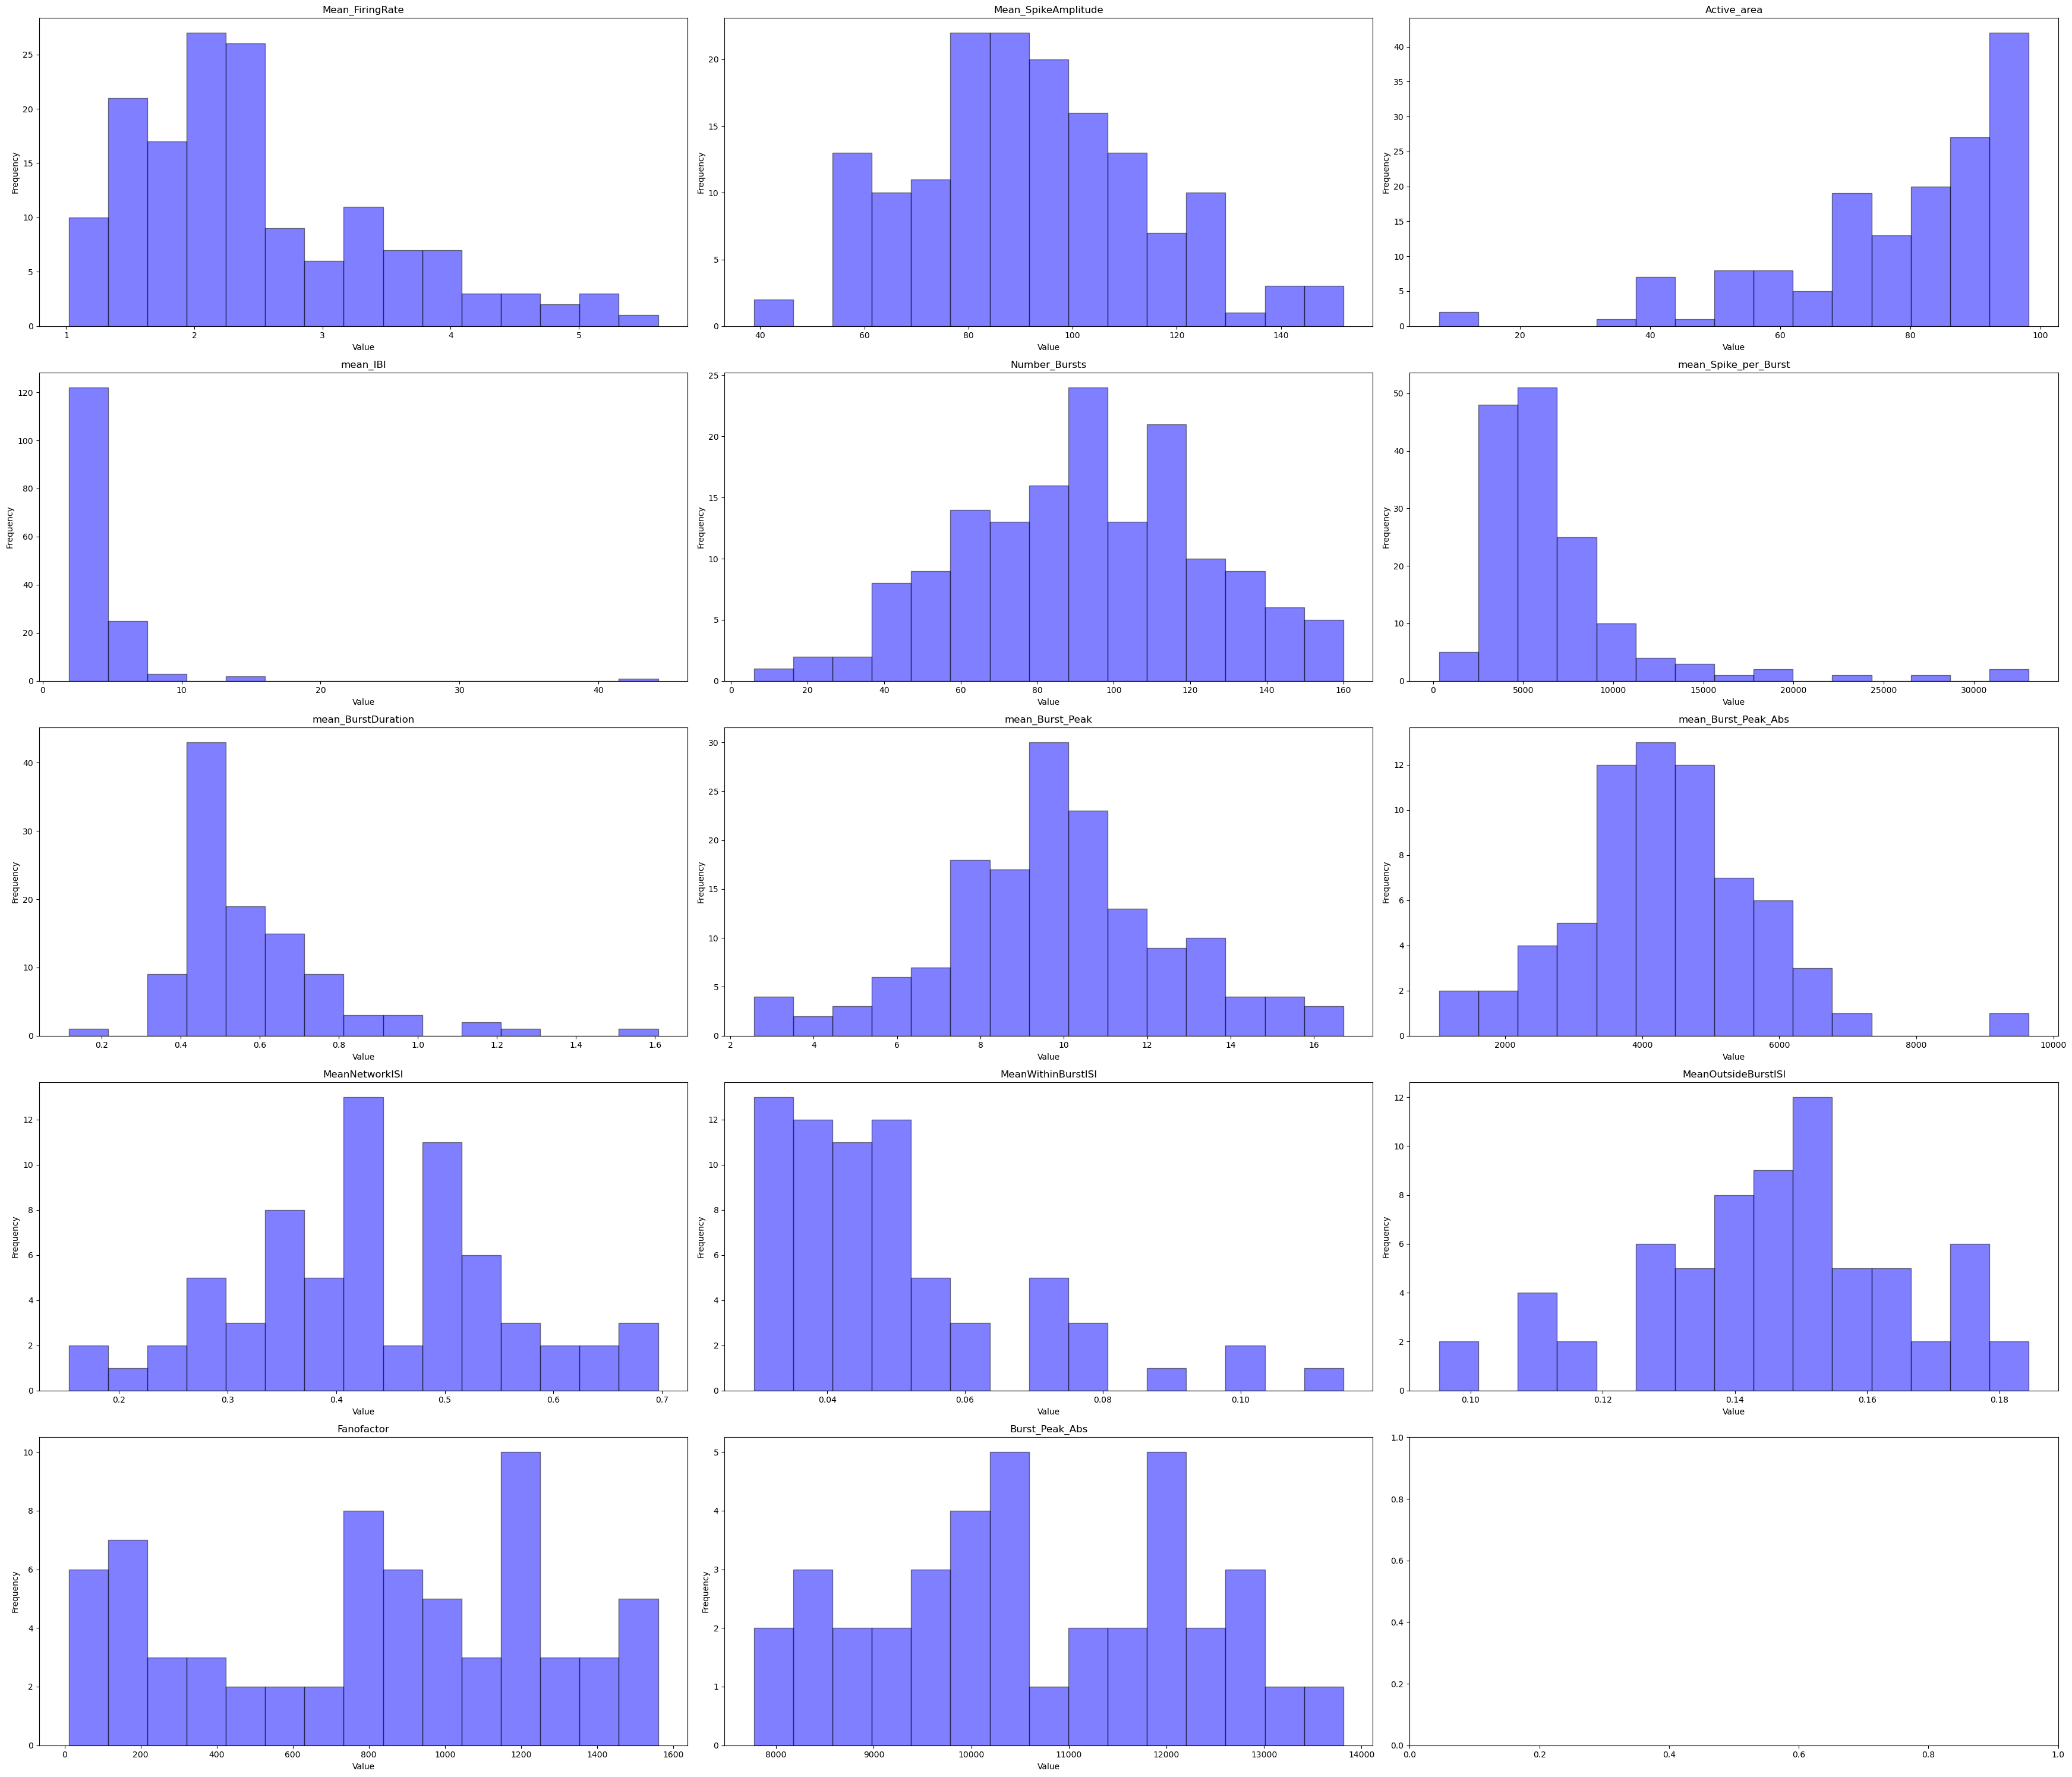

In [27]:
# Check distribution of all features in overall dataset
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(35, 30))

for ax, feature in zip(axes.flatten(), advanced_features):
    ax.hist(all_trials_data[feature], bins=15, color='blue', alpha=0.5, edgecolor='black')
    ax.set_title(feature)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

fig.tight_layout()
plt.show()

**Statistical Testing for Homogeneity**

**LDA**

In [19]:
basic_data.isna().sum()

Trial                   0
Mean_FiringRate         0
Mean_SpikeAmplitude     0
Active_area             0
mean_Burst_Peak         0
Number_Bursts           0
mean_Spike_per_Burst    0
dtype: int64

In [20]:
basic_data.dtypes

Trial                    object
Mean_FiringRate         float64
Mean_SpikeAmplitude     float64
Active_area             float64
mean_Burst_Peak         float64
Number_Bursts             int64
mean_Spike_per_Burst    float64
dtype: object

In [21]:
# import pandas as pd

# # Import the functions from the lda_visualization module
# from lda_visualization import plot_biplot, plot_density, lda_plot

# # Example usage of the functions
# def main():

#     # Define the features you want to analyze
#     feature_names = basic_features

#     # Specify the column you want to analyze
#     group_column = 'Trial'  

#     # Load data to make sure it fits your requirements
#     data = basic_data

#     # Now call the function with the data
#     if len(data[group_column].unique()) == 2:
#         plot_density(data, feature_names, group_column)
#     elif len(data[group_column].unique()) > 2:
#         plot_biplot(data, feature_names, group_column)

# # This ensures the main function runs only if this file is executed as the main program.
# if __name__ == "__main__": # 
#     main()

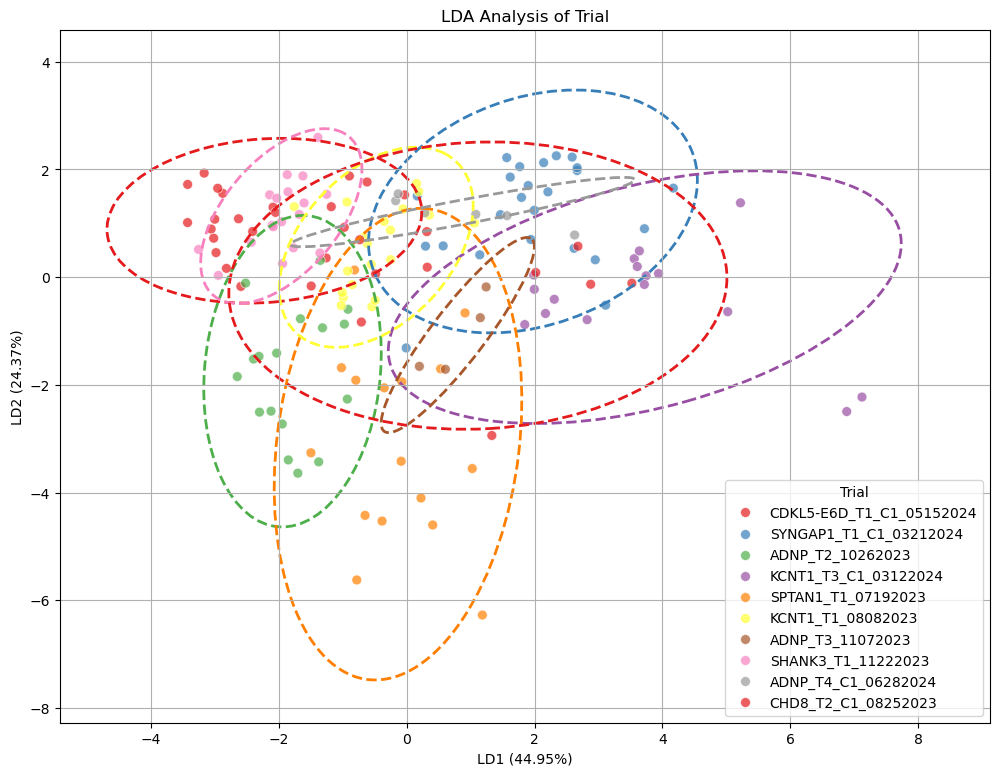

In [22]:
from lda_visualization import plot_biplot, plot_density, lda_plot

feature_names = basic_features

group_column = 'Trial'  

# Load data 
data = basic_data

# call the function with the data
if len(data[group_column].unique()) == 2:
    plot_density(data, feature_names, group_column)
elif len(data[group_column].unique()) > 2:
    plot_biplot(data, feature_names, group_column)

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)  # Assuming you are looking for 2 components
X = advanced_data[advanced_features]  # ensure 'feature_names' contains the correct features to transform
y = advanced_data['Trial']  # 'group_column' should be the column based on which LDA is performed

X_lda = lda.fit_transform(X, y)
advanced_data['LD1'], advanced_data['LD2'] = X_lda[:, 0], X_lda[:, 1]

# Check if the necessary columns are present
if 'LD1' in advanced_data.columns and 'LD2' in advanced_data.columns:
    for group in advanced_data['Trial'].unique():
        sub_data = advanced_data[advanced_data['Trial'] == group]
        covariance = np.cov(sub_data[['LD1', 'LD2']].T)

        print("Sub-data shape:", sub_data.shape)
        print("Covariance matrix:\n", covariance)
        print("Determinant of covariance matrix:", np.linalg.det(covariance))

        try:
            lambda_, v = np.linalg.eig(covariance)
        except np.linalg.LinAlgError as e:
            print("Failed to compute eigenvalues:", e)
            raise
else:
    print("LD1 and LD2 columns are missing in the DataFrame. Check the LDA transformation step.")

# Add these checks just before the eigenvalue calculation:
if np.isnan(covariance).any() or np.isinf(covariance).any():
    print("Covariance contains NaN or inf:", covariance)


ValueError: Input X contains NaN.
LinearDiscriminantAnalysis does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

**K means clustering**

**Multivariate Assessment**

***Assessment of Normality***

Shapiro-Wilk Test or Kolmogorov-Smirnov Test can be used to assess whether each feature follows a normal distribution across trials. This will help determine whether parametric or non-parametric tests should be applied.

In [ ]:
# Shapiro-Wilk test
from scipy.stats import shapiro

# Initialize a dictionary to store the results
normality_results = {}

# Perform the Shapiro-Wilk test for each feature
for feature in basic_features:
    stat, p_value = shapiro(basic_data[feature])
    normality_results[feature] = {'Statistic': stat, 'p-value': p_value}

# Convert results to DataFrame for better readability
normality_test_df = pd.DataFrame(normality_results).T
normality_test_df

,Statistic,p-value
Mean_FiringRate,0.918540,1.355997e-07
Mean_SpikeAmplitude,0.990177,3.662469e-01
Active_area,0.871758,3.365037e-10
mean_Burst_Peak,0.986763,1.541877e-01
Number_Bursts,0.992550,6.124413e-01
mean_Spike_per_Burst,0.672554,5.220825e-17


In [ ]:
# Kolmogorov-Smirnov test
from scipy.stats import kstest
import pandas as pd

ks_results = {}

for feature in basic_features:
    # Standardize the data before performing the test
    standardized_data = (basic_data[feature] - basic_data[feature].mean()) / basic_data[feature].std()
    stat, p_value = kstest(standardized_data, 'norm')
    ks_results[feature] = {'Statistic': stat, 'p-value': p_value}

# Convert results to DataFrame for better readability
ks_test_df = pd.DataFrame(ks_results).T
ks_test_df

,Statistic,p-value
Mean_FiringRate,0.148556,2.063919e-03
Mean_SpikeAmplitude,0.044346,9.110610e-01
Active_area,0.138597,5.019209e-03
mean_Burst_Peak,0.055484,7.125149e-01
Number_Bursts,0.039863,9.601712e-01
mean_Spike_per_Burst,0.216796,8.584210e-07


Most of the features, except for "Number of Bursts" and possibly "Mean Burst Peak," do not appear to be normally distributed based on the Shapiro-Wilk test results. This information is crucial for further statistical analyses, as many parametric tests assume normality of the data.

However, all of these features appear to be normally distributed based on Kolmogorov-Smirnov (KS) test.

**Univariate Assessment**

First, we can select one feature, namely Active_area for analysis.

In [ ]:
# Initialize a dictionary to store results
results = {}

# Group data by 'Trial'
grouped = basic_data.groupby('Trial')

# Perform tests for each trial
for trial, group in grouped:
    active_area_data = group['Active_area']
    mean, std = active_area_data.mean(), active_area_data.std()
    
    # Shapiro-Wilk test
    shapiro_stat, shapiro_p = shapiro(active_area_data)
    shapiro_result = 'Normal' if shapiro_p >= 0.05 else 'Not Normal'
    
    # Kolmogorov-Smirnov test
    ks_stat, ks_p = kstest(active_area_data, 'norm', args=(mean, std))
    ks_result = 'Normal' if ks_p >= 0.05 else 'Not Normal'
    
    # Store results
    results[trial] = {
        'Shapiro-Wilk Statistic': shapiro_stat,
        'Shapiro-Wilk p-value': shapiro_p,
        'Shapiro-Wilk Result': shapiro_result,
        'Kolmogorov-Smirnov Statistic': ks_stat,
        'Kolmogorov-Smirnov p-value': ks_p,
        'Kolmogorov-Smirnov Result': ks_result
    }

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results).T
results_df

,Shapiro-Wilk Statistic,Shapiro-Wilk p-value,Shapiro-Wilk Result,Kolmogorov-Smirnov Statistic,Kolmogorov-Smirnov p-value,Kolmogorov-Smirnov Result
ADNP_T2_10262023,0.888424,0.043646,Not Normal,0.186178,0.536951,Normal
ADNP_T3_11072023,0.985943,0.935875,Normal,0.176349,0.99733,Normal
ADNP_T4_C1_06282024,0.928652,0.569736,Normal,0.21598,0.890552,Normal
CDKL5-E6D_T1_C1_05152024,0.905263,0.037932,Not Normal,0.176125,0.451198,Normal
CHD8_T2_C1_08252023,0.926019,0.409898,Normal,0.176298,0.863776,Normal
KCNT1_T1_08082023,0.878499,0.016628,Not Normal,0.186236,0.438756,Normal
KCNT1_T3_C1_03122024,0.782578,0.001614,Not Normal,0.221172,0.360273,Normal
SHANK3_T1_11222023,0.888404,0.036241,Not Normal,0.154818,0.725143,Normal
SPTAN1_T1_07192023,0.971454,0.861582,Normal,0.104606,0.986989,Normal
SYNGAP1_T1_C1_03212024,0.928781,0.09156,Normal,0.161851,0.504762,Normal


***Assessment of Homogeneity of Variance***

Use tests like Levene’s Test or Bartlett’s Test to check the homogeneity of variances across trials, which is an assumption for ANOVA.

In [ ]:
# Levene's test
import pandas as pd
from scipy.stats import levene
import numpy as np


# Group data by 'Trial' and extract 'Active_area' values for each group
groups = [group['Active_area'].values for name, group in basic_data.groupby('Trial')]

# Perform Levene's test for homogeneity of variances
stat, p_value = levene(*groups)

print(f"Levene's Test Statistic: {stat:.3f}")
print(f"Levene's Test p-value: {p_value:.3f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Suggests heterogeneity of variances.")
else:
    print("Fail to reject the null hypothesis: Suggests homogeneity of variances.")

Levene's Test Statistic: 6.049
Levene's Test p-value: 0.000
Reject the null hypothesis: Suggests heterogeneity of variances.


In [ ]:
# Bartlett’s Test

from scipy.stats import bartlett
# Group data by 'Trial' and extract 'Active_area' values for each group
groups = [group['Active_area'].values for name, group in basic_data.groupby('Trial')]

# Perform Bartlett’s test for homogeneity of variances
stat, p_value = bartlett(*groups)

print(f"Bartlett’s Test Statistic: {stat:.3f}")
print(f"Bartlett’s Test p-value: {p_value:.3f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Suggests heterogeneity of variances.")
else:
    print("Fail to reject the null hypothesis: Suggests homogeneity of variances.")

Bartlett’s Test Statistic: 101.537
Bartlett’s Test p-value: 0.000
Reject the null hypothesis: Suggests heterogeneity of variances.


<Figure size 1500x1200 with 0 Axes>

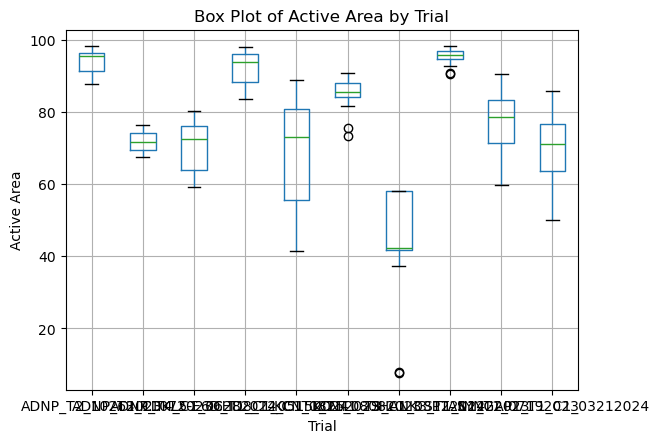

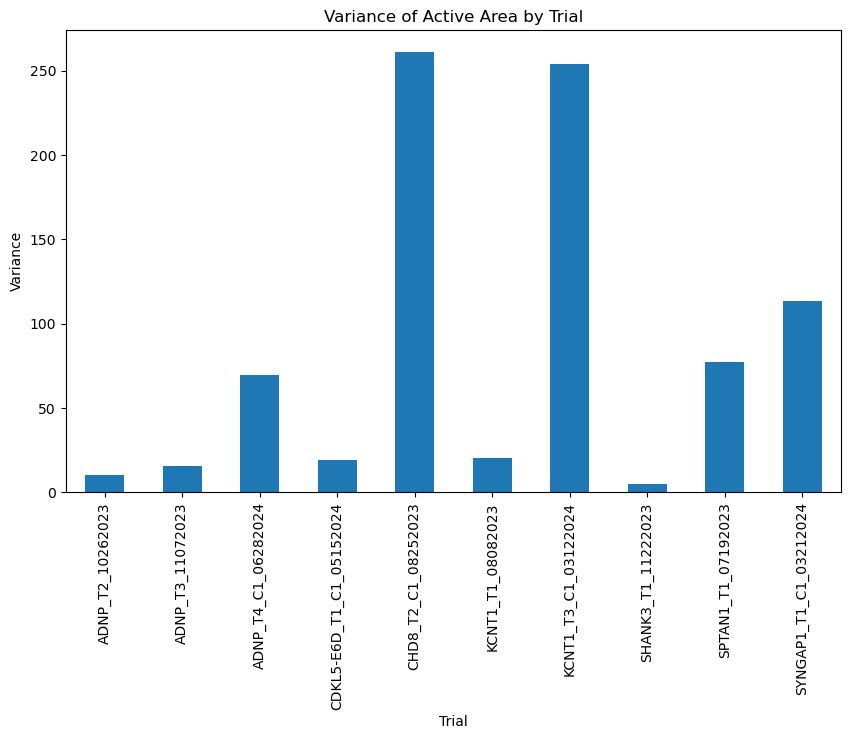

In [ ]:
# Plotting Box Plots
plt.figure(figsize=(15, 12))
basic_data.boxplot(column='Active_area', by='Trial')
plt.title('Box Plot of Active Area by Trial')
plt.suptitle('')  # Remove default suptitle to clean up plot appearance
plt.xlabel('Trial')
plt.ylabel('Active Area')
plt.show()

# Calculating and Plotting Variances
group_variances = basic_data.groupby('Trial')['Active_area'].var()
plt.figure(figsize=(10, 6))
group_variances.plot(kind='bar')
plt.title('Variance of Active Area by Trial')
plt.xlabel('Trial')
plt.ylabel('Variance')
plt.show()

In [ ]:
# try log transformation
# Adding a small constant in case of zero or negative values
basic_data['Log_Active_area'] = np.log(basic_data['Active_area'] + 1 - basic_data['Active_area'].min())

# Group data by 'Trial' and extract 'Log_Active_area' values for each group
groups = [group['Log_Active_area'].values for name, group in basic_data.groupby('Trial')]

# Perform Bartlett’s test for homogeneity of variances
bartlett_stat, bartlett_p_value = bartlett(*groups)
print(f"Bartlett’s Test Statistic: {bartlett_stat:.3f}")
print(f"Bartlett’s Test p-value: {bartlett_p_value:.3f}")

# Perform Levene's test for homogeneity of variances
levene_stat, levene_p_value = levene(*groups)
print(f"Levene's Test Statistic: {levene_stat:.3f}")
print(f"Levene's Test p-value: {levene_p_value:.3f}")

# Interpretation
if bartlett_p_value < 0.05:
    print("Bartlett's Test: Reject the null hypothesis, suggests heterogeneity of variances.")
else:
    print("Bartlett's Test: Fail to reject the null hypothesis, suggests homogeneity of variances.")

if levene_p_value < 0.05:
    print("Levene's Test: Reject the null hypothesis, suggests heterogeneity of variances.")
else:
    print("Levene's Test: Fail to reject the null hypothesis, suggests homogeneity of variances.")

Bartlett’s Test Statistic: 389.360
Bartlett’s Test p-value: 0.000
Levene's Test Statistic: 3.339
Levene's Test p-value: 0.001
Bartlett's Test: Reject the null hypothesis, suggests heterogeneity of variances.
Levene's Test: Reject the null hypothesis, suggests heterogeneity of variances.


<Figure size 1500x1200 with 0 Axes>

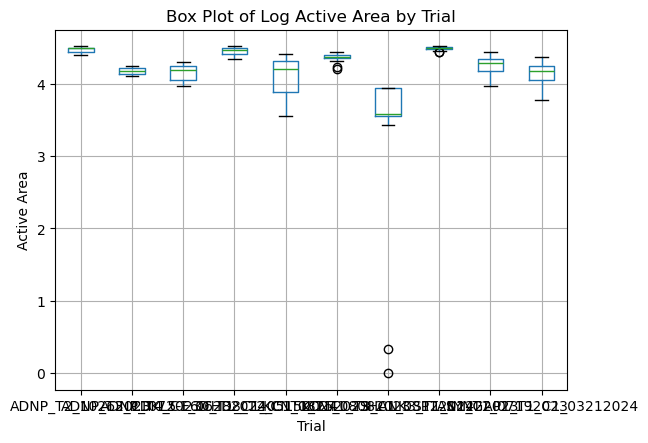

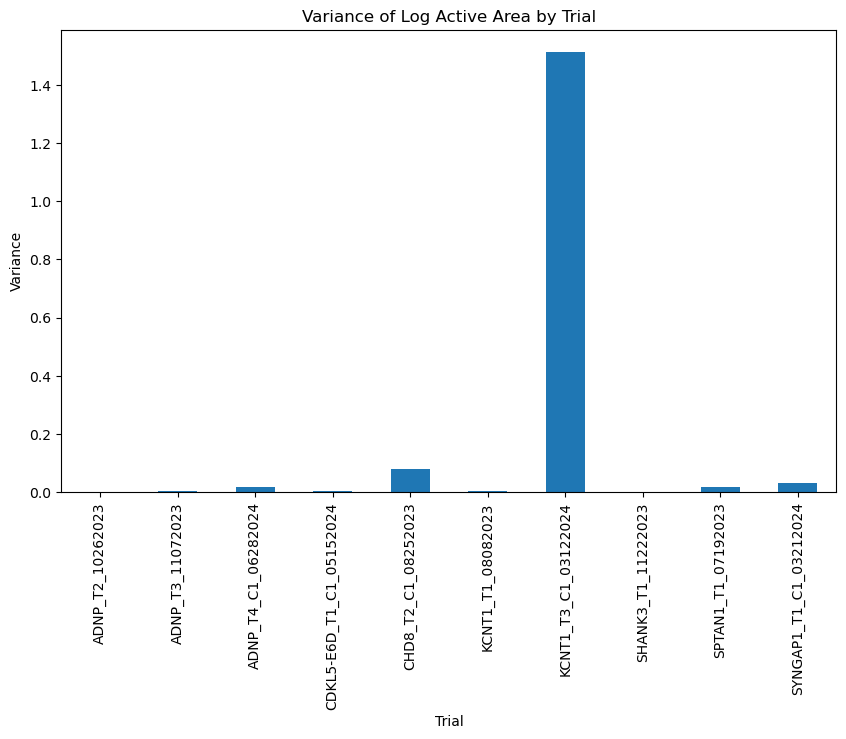

In [ ]:
# Plotting Box Plots
plt.figure(figsize=(15, 12))
basic_data.boxplot(column='Log_Active_area', by='Trial')
plt.title('Box Plot of Log Active Area by Trial')
plt.suptitle('')  # Remove default suptitle to clean up plot appearance
plt.xlabel('Trial')
plt.ylabel('Active Area')
plt.show()

# Calculating and Plotting Variances
group_variances = basic_data.groupby('Trial')['Log_Active_area'].var()
plt.figure(figsize=(10, 6))
group_variances.plot(kind='bar')
plt.title('Variance of Log Active Area by Trial')
plt.xlabel('Trial')
plt.ylabel('Variance')
plt.show()

In [ ]:
# Try to rule out KCNT1_T1_08082023 do the test again (KCNT1_T1_08082023 is the trial with the largest variance also not pass the quick test last week)
# Select all trials except 'KCNT1_T1_08082023'
selected_trials = basic_data[basic_data['Trial'] != 'KCNT1_T1_08082023']
# Group data by 'Trial' and extract 'Log_Active_area' values for each group
groups = [group['Active_area'].values for name, group in selected_trials.groupby('Trial')]

# Perform Bartlett’s test for homogeneity of variances
bartlett_stat, bartlett_p_value = bartlett(*groups)
print(f"Bartlett’s Test Statistic: {bartlett_stat:.3f}")
print(f"Bartlett’s Test p-value: {bartlett_p_value:.3f}")

# Perform Levene's test for homogeneity of variances
levene_stat, levene_p_value = levene(*groups)
print(f"Levene's Test Statistic: {levene_stat:.3f}")
print(f"Levene's Test p-value: {levene_p_value:.3f}")

# Interpretation
if bartlett_p_value < 0.05:
    print("Bartlett's Test: Reject the null hypothesis, suggests heterogeneity of variances.")
else:
    print("Bartlett's Test: Fail to reject the null hypothesis, suggests homogeneity of variances.")

if levene_p_value < 0.05:
    print("Levene's Test: Reject the null hypothesis, suggests heterogeneity of variances.")
else:
    print("Levene's Test: Fail to reject the null hypothesis, suggests homogeneity of variances.")

Bartlett’s Test Statistic: 89.187
Bartlett’s Test p-value: 0.000
Levene's Test Statistic: 5.638
Levene's Test p-value: 0.000
Bartlett's Test: Reject the null hypothesis, suggests heterogeneity of variances.
Levene's Test: Reject the null hypothesis, suggests heterogeneity of variances.


In [ ]:
# Try to rule out KCNT1_T1_08082023 and SYNGAP1_T3_C1_08092024 and do the test again
# Select all trials except 'KCNT1_T1_08082023'
selected_trials = basic_data[basic_data['Trial'] != 'KCNT1_T1_08082023']
# Group data by 'Trial' and extract 'Log_Active_area' values for each group
log_groups = [group['Log_Active_area'].values for name, group in selected_trials.groupby('Trial')]

# Perform Bartlett’s test for homogeneity of variances
bartlett_stat, bartlett_p_value = bartlett(*log_groups)
print(f"Bartlett’s Test Statistic: {bartlett_stat:.3f}")
print(f"Bartlett’s Test p-value: {bartlett_p_value:.3f}")

# Perform Levene's test for homogeneity of variances
levene_stat, levene_p_value = levene(*log_groups)
print(f"Levene's Test Statistic: {levene_stat:.3f}")
print(f"Levene's Test p-value: {levene_p_value:.3f}")

# Interpretation
if bartlett_p_value < 0.05:
    print("Bartlett's Test: Reject the null hypothesis, suggests heterogeneity of variances.")
else:
    print("Bartlett's Test: Fail to reject the null hypothesis, suggests homogeneity of variances.")

if levene_p_value < 0.05:
    print("Levene's Test: Reject the null hypothesis, suggests heterogeneity of variances.")
else:
    print("Levene's Test: Fail to reject the null hypothesis, suggests homogeneity of variances.")

Bartlett’s Test Statistic: 334.114
Bartlett’s Test p-value: 0.000
Levene's Test Statistic: 3.122
Levene's Test p-value: 0.003
Bartlett's Test: Reject the null hypothesis, suggests heterogeneity of variances.
Levene's Test: Reject the null hypothesis, suggests heterogeneity of variances.


***Anova(one way)***

In [ ]:
import pandas as pd
from scipy.stats import f_oneway
import numpy as np

# Group data by 'Trial' and extract 'Active_area' values for each group
groups = {name: group['Active_area'].values for name, group in basic_data.groupby('Trial')}

# Perform One-Way ANOVA
anova_stat, anova_p_value = f_oneway(*groups.values())

print(f"ANOVA F-Statistic: {anova_stat:.3f}")
print(f"ANOVA p-value: {anova_p_value:.3f}")

# Interpretation
if anova_p_value < 0.05:
    print("There is a statistically significant difference between the groups.")
else:
    print("There is no statistically significant difference between the groups.")


ANOVA F-Statistic: 52.311
ANOVA p-value: 0.000
There is a statistically significant difference between the groups.


***Multivariate Analysis of Variance (MANOVA)***

MANOVA can be used to assess the differences across trials on a combination of dependent variables. It helps determine if the vector of means of the dependent variables is the same across trials.

If assumptions above (normality, homogeneity of variances) are not violated, continue with MANOVA. If the assumptions of ANOVA are violated, consider using non-parametric alternatives like the Kruskal-Wallis test.

Before performing MANOVA, you need to verify that your data meet certain assumptions:

Multivariate Normality: Each group should have multivariate normal distribution.

Test: Use Mardia's test or Henze-Zirkler's test.

Homogeneity of Variance-Covariance Matrices: Covariance matrices should be equal across groups.

Test: Use Box's M test.

Independence of Observations: Each observation should be independent.

Absence of Multicollinearity: Variables should not be highly correlated.

Check: Compute correlation matrix and variance inflation factors (VIF).


Check Multivariate Normality

In [ ]:
from pingouin import multivariate_normality

# Group the data by 'Trial'
grouped = basic_data.groupby('Trial')

# Loop through each group and perform the multivariate normality test using HZ method
for name, group in grouped:
    # Perform HZ test
    mvn_test = multivariate_normality(group.iloc[:, 1:], alpha=0.05)
    
    # Access the attributes
    hz_stat = mvn_test.hz
    p_value = mvn_test.pval
    normality = mvn_test.normal
    
    # Print the results
    print(f"Group: {name}")
    print(f"  Henze-Zirkler's HZ Statistic: {hz_stat}, p-value: {p_value}")
    print(f"  Multivariate Normality: {'Yes' if normality else 'No'}\n")

Group: ADNP_T2_10262023
  Henze-Zirkler's HZ Statistic: 0.891489287657507, p-value: 0.1371328754494791
  Multivariate Normality: Yes

Group: ADNP_T3_11072023
  Henze-Zirkler's HZ Statistic: 16, p-value: 9.865075727181409e-252
  Multivariate Normality: No

Group: ADNP_T4_C1_06282024
  Henze-Zirkler's HZ Statistic: 24, p-value: 0.0
  Multivariate Normality: No

Group: CDKL5-E6D_T1_C1_05152024
  Henze-Zirkler's HZ Statistic: 0.9314340111045543, p-value: 0.06648954638773738
  Multivariate Normality: Yes

Group: CHD8_T2_C1_08252023
  Henze-Zirkler's HZ Statistic: 0.8692015592400786, p-value: 0.11362973716785146
  Multivariate Normality: Yes

Group: KCNT1_T1_08082023
  Henze-Zirkler's HZ Statistic: 0.9646851780893178, p-value: 0.0200866431014106
  Multivariate Normality: No

Group: KCNT1_T3_C1_03122024
  Henze-Zirkler's HZ Statistic: 1.0346955153113275, p-value: 0.0008905864894075259
  Multivariate Normality: No

Group: SHANK3_T1_11222023
  Henze-Zirkler's HZ Statistic: 0.9855491985860689, p

**Post-hoc Testing (Turkey's test)**

If ANOVA or Kruskal-Wallis shows significant differences, follow up with post-hoc tests like Tukey’s HSD (for ANOVA) or Dunn’s test (for Kruskal-Wallis) to pinpoint which trials are significantly different.

**Visualization**

Use boxplots, scatter plots, or violin plots to visually compare the distribution of each feature across trials.
Consider plotting confidence intervals to see how much overlap there is between trials.

**PCA (Principal Component Analysis)**

to explore overall feature variation between trials